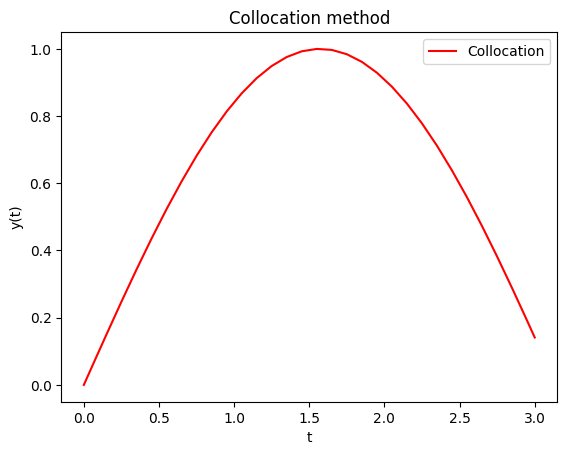

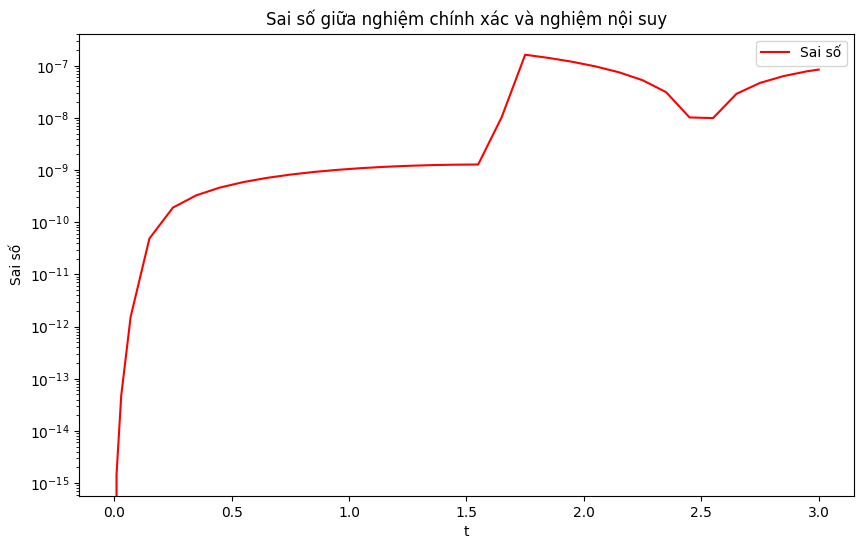

In [1]:
from doan1_dongian.lib_collocation import *
import numpy as np
import matplotlib.pyplot as plt
# hàm np.atleast_1d sẽ trả về một mảng có ít nhất 1 chiều
def f(t, y, y_delay):
    y = np.atleast_1d(y)
    y_delay = np.atleast_1d(y_delay)
    return -y_delay
def tau(t, y):
    return np.pi/2
def phi(t):
    return np.atleast_1d(np.sin(t))
def y_exact(t):
    return np.sin(t)
t0 = 0
tf = 3
h0 = 0.01
tol = 1e-6
# sau này sẽ thêm các hàm ước lượng Lipchitz sau
L_f_u = 0.0
L_f_v = 1.0
L_tau_y = 0.0

ts, ys = solve_dde_collocation_adaptive(f, tau, phi, t0, tf, h0,
                                              method_name='gauss', s=2, tol=tol,
                                              L_f_u=L_f_u, L_f_v=L_f_v, L_tau_y=L_tau_y,
                                              h_min=1e-6, h_max=0.1)
plt.plot(ts, ys, 'r-', label='Collocation')
plt.title('Collocation method')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
def compute_error(ts, ys):
    return np.abs(ys[:, 0] - y_exact(ts))
def plot_error(ts, errors):
        plt.figure(figsize=(10, 6))
        plt.plot(ts, errors, 'r-', label='Sai số')
        plt.xlabel('t')
        plt.ylabel('Sai số')
        plt.yscale('log')
        plt.title("Sai số giữa nghiệm chính xác và nghiệm nội suy")
        plt.legend()
        plt.show()
errors = compute_error(ts, ys)
plot_error(ts, errors)



In [2]:
len(ts)

34